In [1]:
# dependencies
import pandas as pd

In [2]:
# import
df = pd.read_csv('concatenated_reviews.csv')

Data Preprocessing

In [3]:
# created a new column called title_body that concatenates the title and body columns
df['title_body'] = df['title'] + " " + df['body']

In [4]:
# lowercase the title_body column
df['title_body'] = df['title_body'].str.lower()

In [5]:
# remove punctuation
df['title_body'] = df['title_body'].str.replace('[^\w\s]','')

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
/var/folders/r9/1bkv53y17nx4nlgj5txfvv800000gn/T/ipykernel_37605/2119130431.py:2: SyntaxWarning: invalid escape sequence '\w'
  df['title_body'] = df['title_body'].str.replace('[^\w\s]','')


In [6]:
# remove special characters
df['title_body'] = df['title_body'].str.replace('[^A-Za-z0-9 ]+', '')

In [7]:
# remove numbers
df['title_body'] = df['title_body'].str.replace('\d+', '')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/r9/1bkv53y17nx4nlgj5txfvv800000gn/T/ipykernel_37605/1390135473.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['title_body'] = df['title_body'].str.replace('\d+', '')


In [8]:
# remove extra spaces
df['title_body'] = df['title_body'].str.replace(' +', ' ')

In [9]:
# remove leading and trailing spaces
df['title_body'] = df['title_body'].str.strip()

In [10]:
# remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['title_body'] = df['title_body'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [11]:
# lemmatize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['title_body'] = df['title_body'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [12]:
# remove words with length less than 3
df['title_body'] = df['title_body'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

Word Cloud

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
# combine all the reviews into a single string
text = " ".join(str(review) for review in df.title_body)

In [15]:
# display the word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white').generate(text)

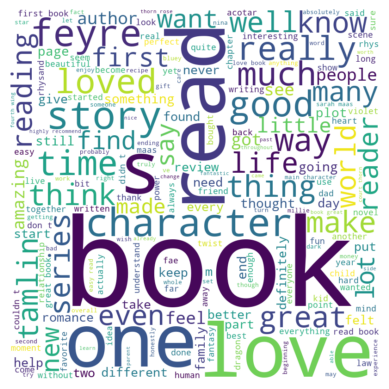

In [16]:
# image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

remove "books", "read" ... in data preprocessing